In [2]:
import cv2 as cv
import os
from time import sleep
from windowcapture import WindowCapture
from vision import Vision
import serial
import matplotlib.pyplot as plt

In [19]:
import cv2 as cv
import numpy as np


class Vision:

    # constructor
    def __init__(self):
        # load the image we're trying to match
        # https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html
        self.first_message = cv.imread('images/msg1.jpeg', cv.IMREAD_UNCHANGED)
        self.second_message = cv.imread('images/msg2.jpeg', cv.IMREAD_UNCHANGED)
        self.two_box = cv.imread('images/2.jpeg', cv.IMREAD_UNCHANGED)
        self.no_box = cv.imread('images/1.jpeg', cv.IMREAD_UNCHANGED)
        self.weight = cv.imread('images/peso.jpeg', cv.IMREAD_UNCHANGED)
        self.numbers = []
        for i in range(10):
            self.numbers.append(cv.imread(f'images/{i}.jpeg', cv.IMREAD_UNCHANGED))

        # There are 6 methods to choose from:
        # TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED

    def findNumbers(self, game_image, threshold=0.9):
        matches = {}
        for i, number_img in enumerate(self.numbers):
            result = cv.matchTemplate(game_image, number_img, cv.TM_CCOEFF_NORMED)
            locations = np.where(result >= threshold)
            locations = list(zip(*locations[::-1]))
            for loc in locations: 
                matches[loc[0]] = i
        result = []
        for key in sorted(matches):
            result.append(matches[key])
            result = [str(r) for r in result]
        return result
    
    def checkMsgOnScreen(self, game_image, type, threshold=0.9):
        if type == 'first_message':
            needle_image = self.first_message
        elif type == 'second_message':
            needle_image = self.second_message
        elif type == 'no_box':
            needle_image = self.no_box
        elif type == 'two_box':
            needle_image = self.two_box
        else:
            needle_image = self.weight

        result = cv.matchTemplate(game_image, needle_image, cv.TM_CCOEFF_NORMED)
        locations = np.where(result >= threshold)
        print(result[locations])
        return np.any(result >= threshold)

In [20]:
vision = Vision()

In [6]:
screenshot1 = cv.imread('img_259.jpeg', cv.IMREAD_UNCHANGED)
screenshot2 = cv.imread('img_269.jpeg', cv.IMREAD_UNCHANGED)
screenshot3 = cv.imread('your_file.jpeg', cv.IMREAD_UNCHANGED)

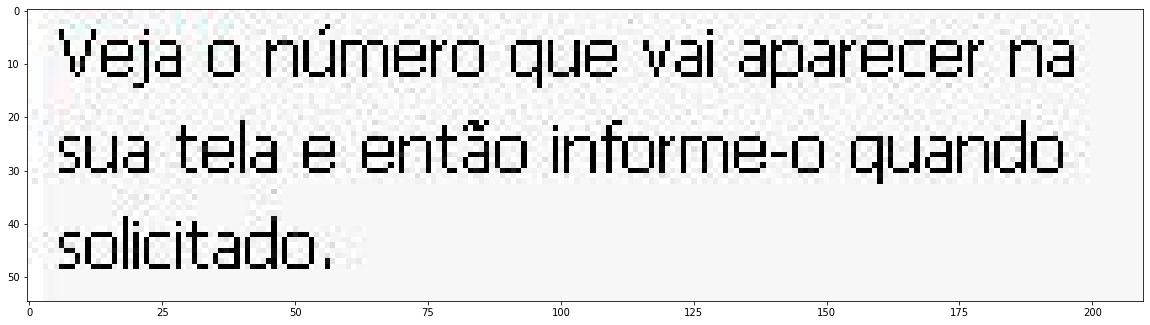

In [8]:
plt.figure(figsize=(20,22))
plt.imshow(screenshot1[135:190, 200:410])

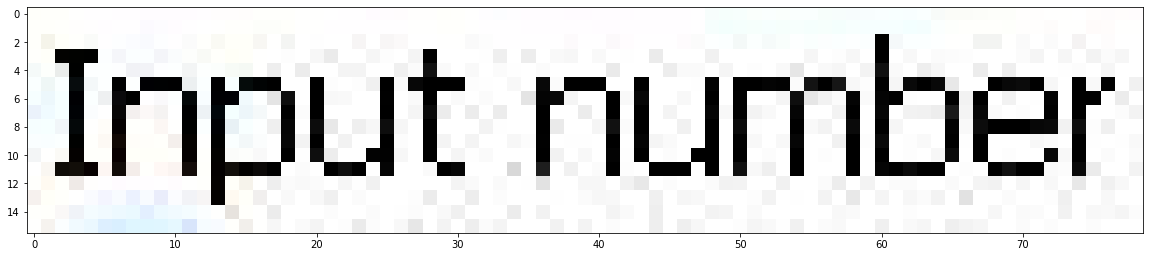

In [22]:
plt.figure(figsize=(20,22))
plt.imshow(screenshot2[318:334, 400:479])

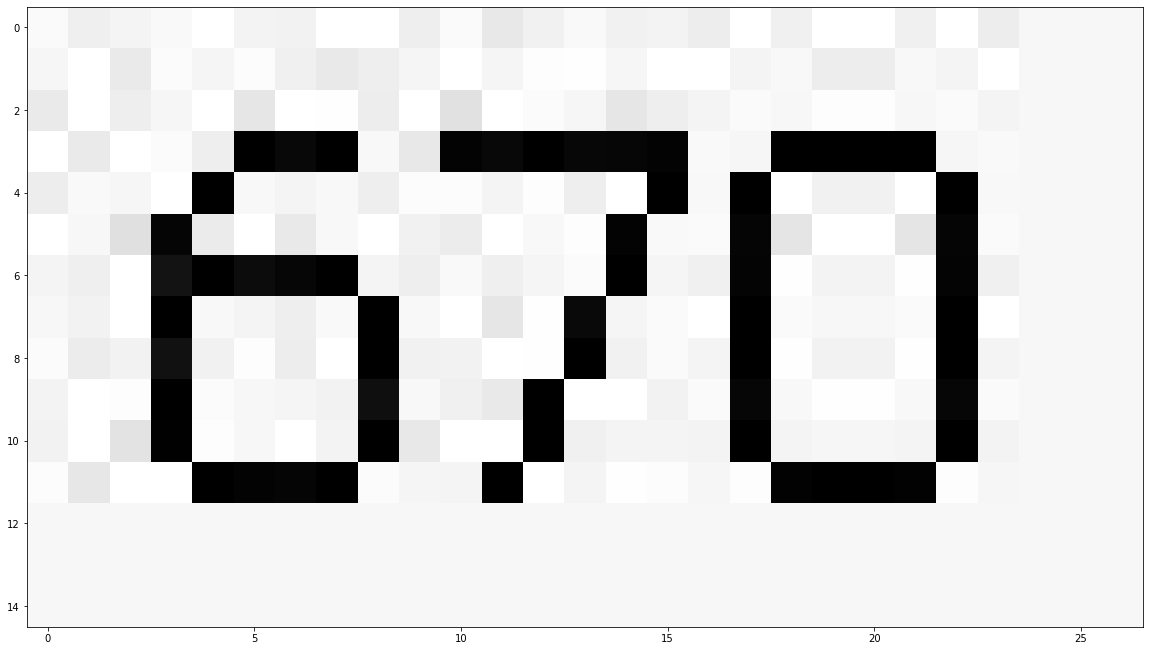

In [26]:
plt.figure(figsize=(20,22))
plt.imshow(screenshot2[172:187, 224:250])

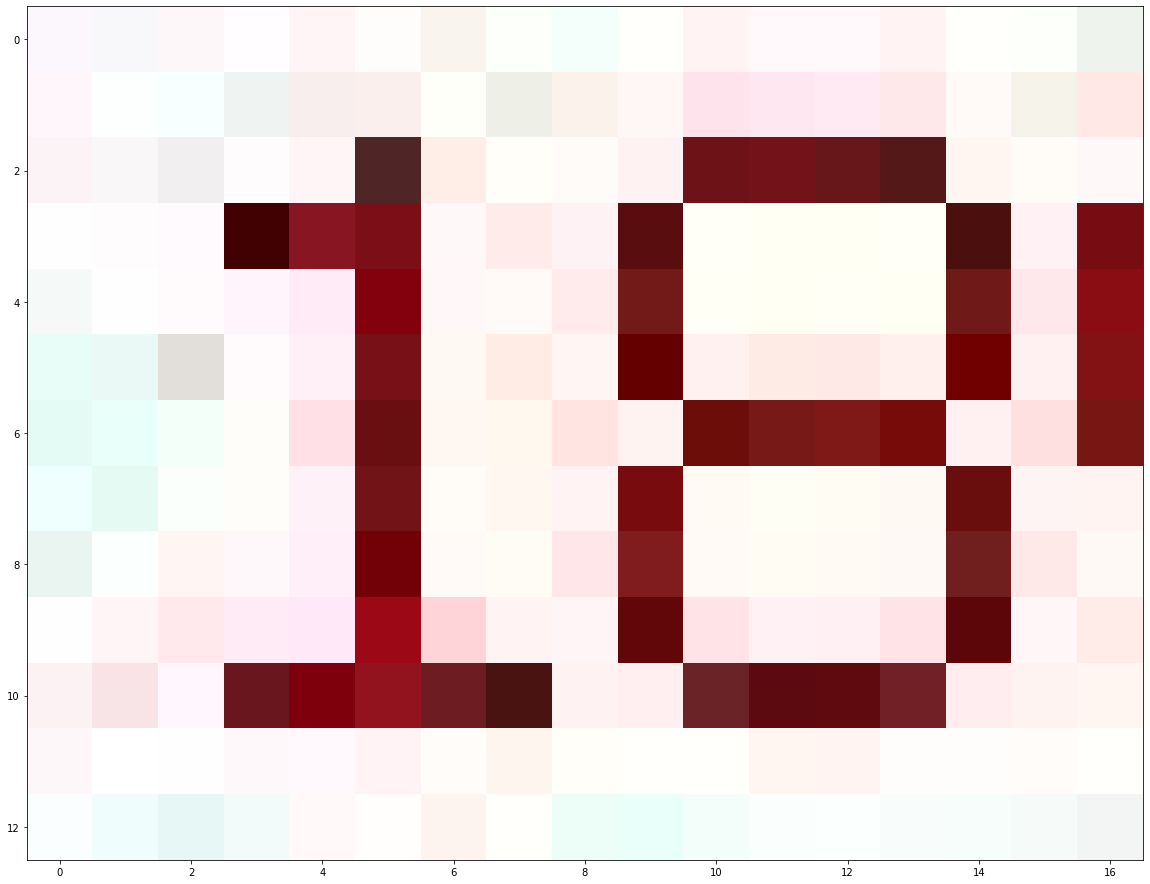

In [30]:
plt.figure(figsize=(20,22))
plt.imshow(screenshot3[113:126, 24:41])

In [16]:
vision.checkMsgOnScreen(screenshot1[135:190, 200:410], 'first_message')

[0.9929776]


True

In [12]:
vision.checkMsgOnScreen(screenshot2[318:334, 400:479], 'second_message')

True

In [33]:
vision.checkMsgOnScreen(screenshot3[113:126, 24:41], 'weight')

[0.9922295]


True

In [32]:
vision.findNumbers(screenshot2[172:187, 224:250])

['6', '7', '0']

## testando abrir caixas

In [4]:
screenshot1 = cv.imread('img_48.jpeg', cv.IMREAD_UNCHANGED)
screenshot2 = cv.imread('img_49.jpeg', cv.IMREAD_UNCHANGED)
screenshot3 = cv.imread('img_51.jpeg', cv.IMREAD_UNCHANGED)

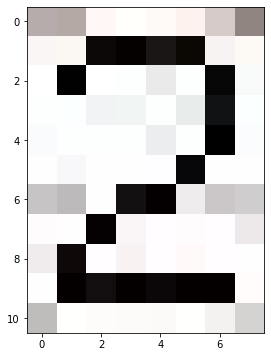

In [16]:
plt.figure(figsize=(5,6))
plt.imshow(screenshot1[19:30, 304:312])

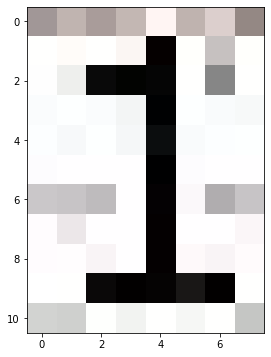

In [17]:
plt.figure(figsize=(5,6))
plt.imshow(screenshot2[19:30, 304:312])

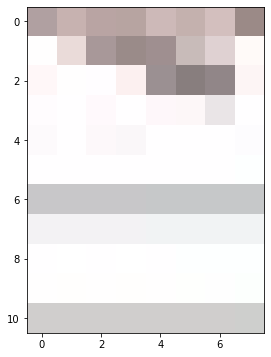

In [18]:
plt.figure(figsize=(5,6))
plt.imshow(screenshot3[19:30, 304:312])

In [24]:
vision.checkMsgOnScreen(screenshot2[19:30, 304:312], 'no_box')

[0.9785008]


True